Name: Batyr Kenzheakhmetov

ID: 000801267

Honor code: I have neither given nor received unauthorized aid in completing this work, nor have I presented someone else’s work as my own.

In [1]:
# We connect to Google Drive to get the necessary files from there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Directories
# Base directory containing the dataset
b_dir = '/content/drive/MyDrive/cats_dogs_sm'

# Directories for training, validation, and testing sets
train_dir = b_dir + '/train'
vali_dir = b_dir + '/validation'
test_dir = b_dir + '/test'

# Directories for cats and dogs in the training set
train_cats_dir = b_dir + '/train/cats'
train_dogs_dir = b_dir + '/train/dogs'

# Directories for cats and dogs in the validation set
vali_cats_dir = b_dir + '/validation/cats'
vali_dogs_dir = b_dir + '/validation/dogs'

# Directories for cats and dogs in the test set
test_cats_dir = b_dir + '/test/cats'
test_dogs_dir = b_dir + '/test/dogs'

import os, shutil

# Display the total number of images in each category
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(vali_cats_dir)))
print('total validation dog images:', len(os.listdir(vali_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1500
total training dog images: 1500
total validation cat images: 700
total validation dog images: 700
total test cat images: 500
total test dog images: 500


Found 3000 files belonging to 2 classes.
Found 1400 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


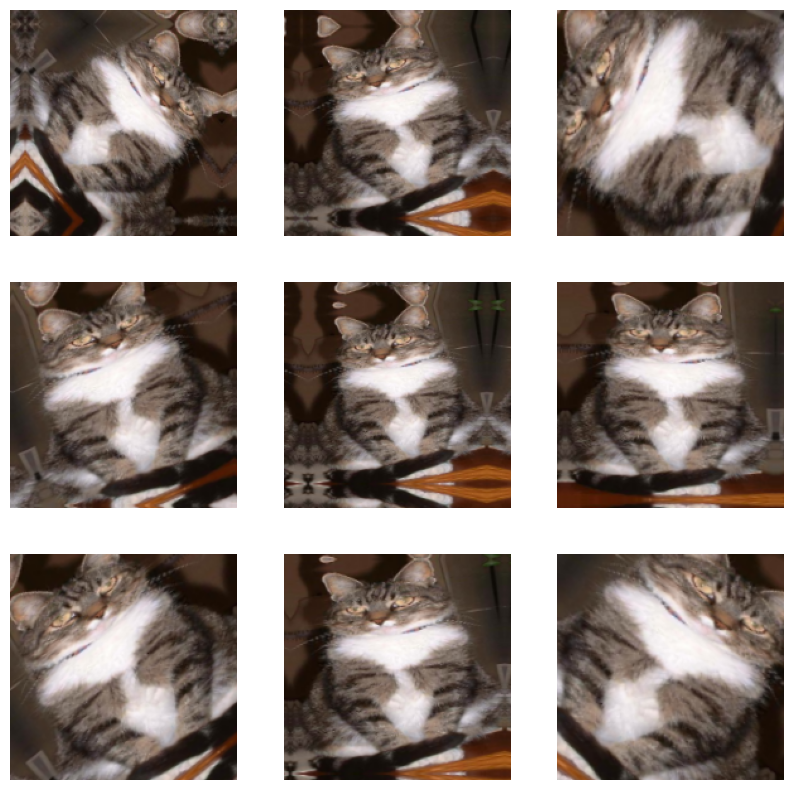

In [3]:
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

# Importing necessary function from Keras utilities for loading image datasets from directories
from keras.utils import image_dataset_from_directory

# Creating train dataset from images in train_dir directory with image size of (180, 180) and batch size of 32
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32)
# Creating validation dataset from images in vali_dir directory with image size of (180, 180) and batch size of 32
validation_dataset = image_dataset_from_directory(
    vali_dir,
    image_size=(180, 180),
    batch_size=32)
# Creating test dataset from images in test_dir directory with image size of (180, 180), batch size of 32, and no shuffling
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32,
    shuffle=False)


# Creating a sequential model for data augmentation using Keras layers
data_augmentation = keras.Sequential(
    [
        # Randomly flip inputs horizontally
        layers.RandomFlip("horizontal"),
        # Randomly rotate inputs by a factor of 0.2
        layers.RandomRotation(0.2),
        # Randomly zoom inputs by a factor of up to 30%
        layers.RandomZoom(0.3),
    ]
)

plt.figure(figsize=(10, 10))                                                    # Creating a figure with a size of 10x10 inches
for images, _ in train_dataset.take(1):                                         # Taking the first batch of images from the train_dataset
    for i in range(9):                                                          # Looping through the first 9 images in the batch
        augmented_images = data_augmentation(images)                            # Applying data augmentation to the images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [4]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.7)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)         # Define the output layer with a single neuron and sigmoid activation function for binary classification
m_da = keras.Model(inputs=inputs, outputs=outputs)         # Create the model specifying inputs and outputs
m_da.compile(loss="binary_crossentropy",                   # Compile the model with binary cross-entropy loss, RMSprop optimizer with learning rate 1e-4, and accuracy metric
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=["accuracy"])

m_da.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

In [5]:
# Define a callback to save the best model during training based on validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="CNN4CatsDogs_DA.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train the model with the defined callbacks and store the training history
history = m_da.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/50
94/94 [==============================] - 25s 182ms/step - loss: 0.6938 - accuracy: 0.4963 - val_loss: 0.6914 - val_accuracy: 0.5014
Epoch 2/50
94/94 [==============================] - 18s 181ms/step - loss: 0.6920 - accuracy: 0.5117 - val_loss: 0.6899 - val_accuracy: 0.5671
Epoch 3/50
94/94 [==============================] - 16s 166ms/step - loss: 0.6872 - accuracy: 0.5390 - val_loss: 0.6821 - val_accuracy: 0.5679
Epoch 4/50
94/94 [==============================] - 17s 170ms/step - loss: 0.6789 - accuracy: 0.5683 - val_loss: 0.6673 - val_accuracy: 0.6129
Epoch 5/50
94/94 [==============================] - 16s 161ms/step - loss: 0.6716 - accuracy: 0.5850 - val_loss: 0.6610 - val_accuracy: 0.6043
Epoch 6/50
94/94 [==============================] - 17s 170ms/step - loss: 0.6622 - accuracy: 0.5990 - val_loss: 0.6752 - val_accuracy: 0.5750
Epoch 7/50
94/94 [==============================] - 16s 161ms/step - loss: 0.6606 - accuracy: 0.6010 - val_loss: 0.7030 - val_accuracy: 0.5479

In [6]:
# Save the model to a file named "my_model.h5"
m_da.save("/my_model.h5")

# Download the saved model file
from google.colab import files
files.download("/my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

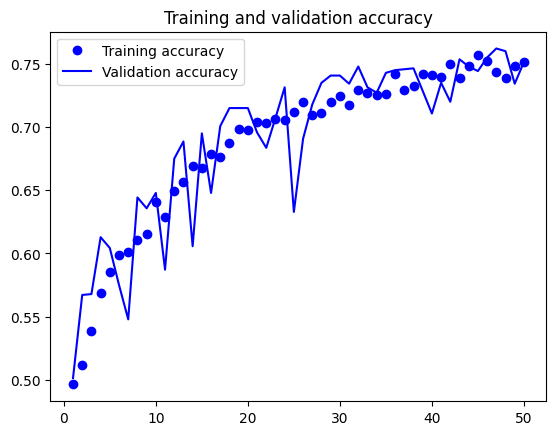

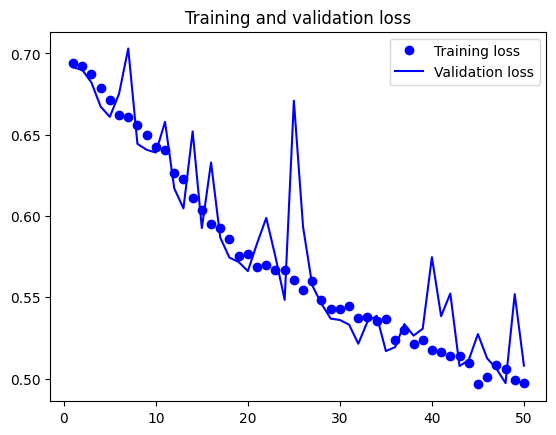

In [7]:
def plot_graphs4vali():
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)
  plt.plot(epochs, accuracy, "bo", label="Training accuracy")
  plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()

plot_graphs4vali()

In [8]:
# To get the 1st batch from test dataset
for test_data_batch, test_labels_batch in test_dataset:
    print('test_data batch shape:', test_data_batch.shape)
    print('test_labels batch shape:', test_labels_batch.shape)
    break
#print(test_data_batch[0]) #float32

test_data batch shape: (32, 180, 180, 3)
test_labels batch shape: (32,)


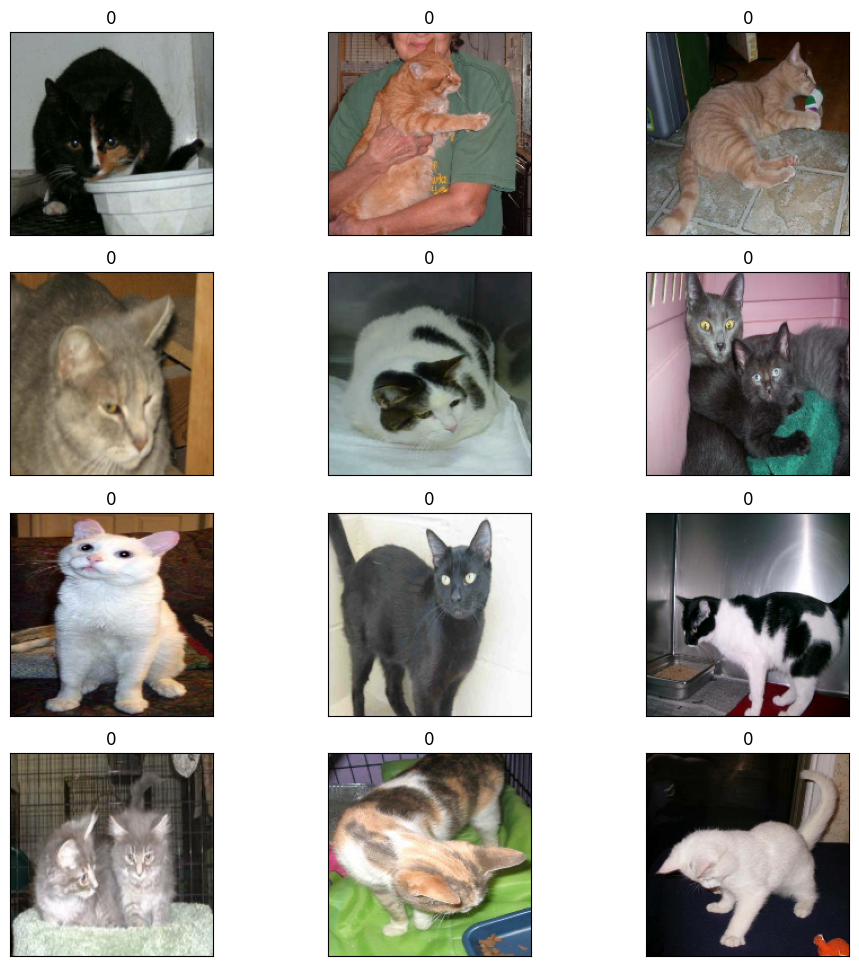

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.tight_layout()
  plt.imshow(test_data_batch[i].numpy().astype("uint8"))
  plt.title(f"{test_labels_batch[i]}")
  plt.xticks([])
  plt.yticks([])

In [10]:
print("target labels:     ", np.array(test_labels_batch))
# present the image to the network
out = m_da.predict(test_data_batch, verbose=0)
out = out.reshape(32,)
print("prediected labels: ", out.round().astype("uint8"))

target labels:      [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
prediected labels:  [0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [11]:
# Load the model with data augmentation
test_model_da = keras.models.load_model("CNN4CatsDogs_DA.keras")

# Evaluate the model on the test dataset with data augmentation
test_loss, test_acc = test_model_da.evaluate(test_dataset)
print(f"Test accuracy with    DA: {test_acc:.3f}")


32/32 [==============================] - 5s 142ms/step - loss: 0.4648 - accuracy: 0.7840
Test accuracy with    DA: 0.784


1/1 [==============================] - 0s 50ms/step


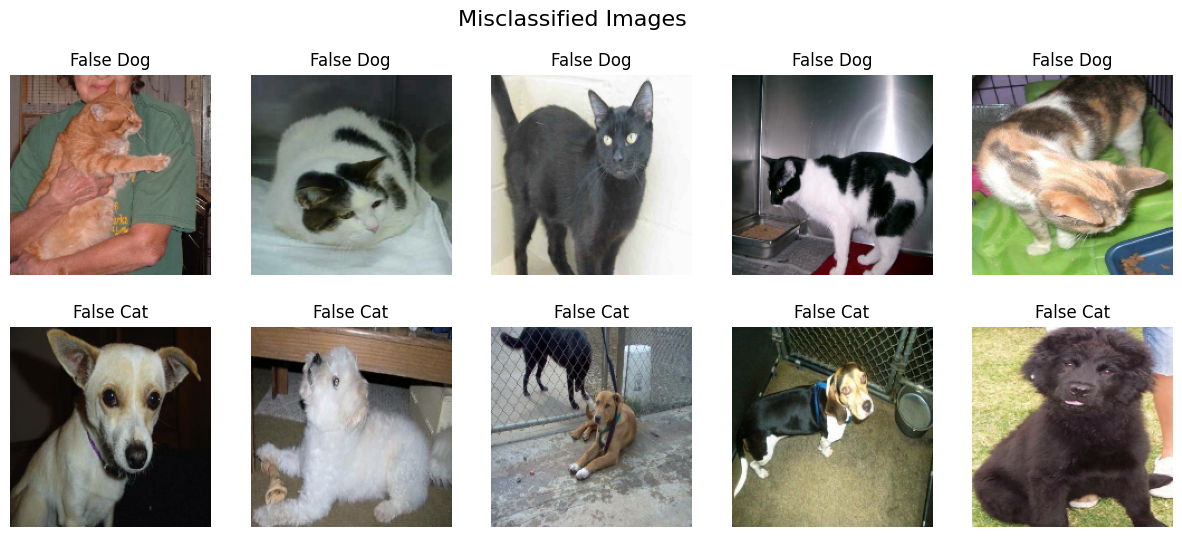

In [12]:
false_dogs_images = []
false_cats_images = []

for test_data_batch, test_labels_batch in test_dataset:
    predictions = test_model_da.predict(test_data_batch)

    # Convert predictions to binary values (0 for cat, 1 for dog)
    predicted_labels = np.round(predictions).astype(int)

    # Iterate over each image and its corresponding label in the batch
    for i in range(len(test_labels_batch)):
        true_label = int(test_labels_batch[i])  # True label (0 for cat, 1 for dog)
        predicted_label = predicted_labels[i]   # Predicted label (0 for cat, 1 for dog)
        image_data = test_data_batch[i].numpy().astype("uint8")

        # Check if the prediction is incorrect
        if predicted_label != true_label:
            # If the true label is 0 (cat), but predicted label is 1 (dog), it's a false dog
            if true_label == 0:
                false_dogs_images.append(image_data)
            # If the true label is 1 (dog), but predicted label is 0 (cat), it's a false cat
            else:
                false_cats_images.append(image_data)

            # Check if we have collected at least 5 examples for both false dogs and false cats
        if len(false_dogs_images) >= 5 and len(false_cats_images) >= 5:
            break
    else:
        continue                                                                # Continue iterating if we haven't collected enough examples yet
    break                                                                       # Break the outer loop if we have collected enough examples for both categories

plt.figure(figsize=(15, 6))
plt.suptitle("Misclassified Images", fontsize=16)

# Display false dogs (cats recognized as dogs)
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(false_dogs_images[i])
    plt.title("False Dog")
    plt.axis('off')

# Display false cats (dogs recognized as cats)
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(false_cats_images[i])
    plt.title("False Cat")
    plt.axis('off')

plt.show()


## **Analysis and Conclusion**

The learning model is designed for image classification, in particular for distinguishing between cats and dogs. It starts with setting up data pipelines to train, validate, and test image datasets using the image_dataset_from_directory Keras function. The training and validation datasets are configured with an image size of ***180x180 pixels*** and a ***batch size of 32***, while the testing dataset is configured with the same image size and batch size but without shuffling.

Once the data is configured, a sequential model is created to augment the data using Keras layers. This model introduces randomness into the training data by applying various transformations such as horizontal flipping, rotation, and scaling. Data augmentation is a technique commonly used to increase the diversity of the training data set, which can lead to better generalization and improved model performance. For this reason, I slightly changed the ***rotation (up to 20%)*** and ***zooming (up to 30%)***, so I tried to increase the possible variety of images. However, I didn't want to transform the image as much as possible to avoid over-shaping.

After the convolutional layers, the model includes a smoothing layer to transform the high-dimensional feature maps into a one-dimensional vector, which is then passed through an elimination layer. Dropout regularization helps prevent overfitting by randomly removing a certain percentage of input units during training.

The output layer of the model consists of a single neuron with a ***sigmoid activation function*** suitable for binary classification problems. This neuron outputs the probability that the input image belongs to one of the classes (cat or dog).

I set the ***dropout to 0.7***, thereby deciding to remove more neurons. With the changes, I didn’t notice much of a difference, of course, unless you decrease or increase it too much. In the end, I decided that a value of 0.7 gives a slightly better result than the original 0.5.

During training, a callback is configured to save the best model based on the validation loss. This callback ensures that only the model with the lowest validation loss is retained, preventing overfitting and providing a reliable model for future use.

The model was initially trained for 100 epochs using the training dataset while monitoring performance on the validation dataset. A training history containing information about training and validation metrics for each epoch is stored for further analysis. During this analysis, a graph was built in which I considered that it was possible to achieve an early stop at the ***50th epoch***. The fact is that in the future the valid loss increased significantly more while the training loss continued to gradually fall.

Overall, this learning model and training procedure provides a robust framework for classifying images of cats and dogs with high accuracy, using data augmentation and regularization techniques to improve model performance and generalization. It is also important to note that, unlike the original model, I took a little*** more images for the training and validation sets***. In the end, my result improved slightly, but training the neural network takes half as much time.